# Interpretation des données

In [50]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set()

In [105]:
data = pd.read_csv('./dataset-48225.csv', sep=",")
data

Month  Day  Year CaptureTime ReleaseTime  BandNumber Species Age  Sex  \
0        9   19  1992       13:30         NaN   877-76317      RT   I  NaN   
1        9   22  1992       10:30               877-76318      RT   I  NaN   
2        9   23  1992       12:45               877-76319      RT   I  NaN   
3        9   23  1992       10:50               745-49508      CH   I    F   
4        9   27  1992       11:15              1253-98801      SS   I    F   
..     ...  ...   ...         ...         ...         ...     ...  ..  ...   
903     11   18  2003       14:44              1177-04777      RT   I  NaN   
904     11   19  2003       10:18               803-05985      SS   I    F   
905     11   19  2003       12:02              1807-53145      RT   I  NaN   
906     11   20  2003        9:56              1177-04778      RT   I  NaN   
907     11   20  2003       13:30              1207-53145      RT   A  NaN   

      Wing  Weight  Culmen  Hallux  Tail  StandardTail  Tarsus  WingPitFat  \
0    385.0   920.0    25.7    30.1   219           NaN     NaN         NaN   
1    376.0   930.0     NaN     NaN   221           NaN     NaN         NaN   
2    381.0   990.0    26.7    31.3   235           NaN     NaN         NaN   
3    265.0   470.0    18.7    23.5   220           NaN     NaN         NaN   
4    205.0   170.0    12.5    14.3   157           NaN     NaN         NaN   
..     ...     ...     ...     ...   ...           ...     ...         ...   
903  380.0  1525.0    26.0    27.6   224         227.0     NaN         NaN   
904  190.0   175.0    12.7    15.4   150         153.0     NaN         NaN   
905  360.0   790.0    21.9    27.6   211         215.0     NaN         NaN   
906  369.0   860.0    25.2    28.0   207         210.0     NaN         NaN   
907  199.0  1290.0    28.7    32.1   222         226.0     NaN         NaN   

     KeelFat  Crop  
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        NaN   NaN  
4        NaN   NaN  
..       ...   ...  
903      3.0   0.0  
904      4.0   0.0  
905      2.0   0.0  
906      2.0   0.0  
907      1.0   0.0  

[908 rows x 19 columns]

In [106]:
data.Species.unique()

array(['RT', 'CH', 'SS'], dtype=object)

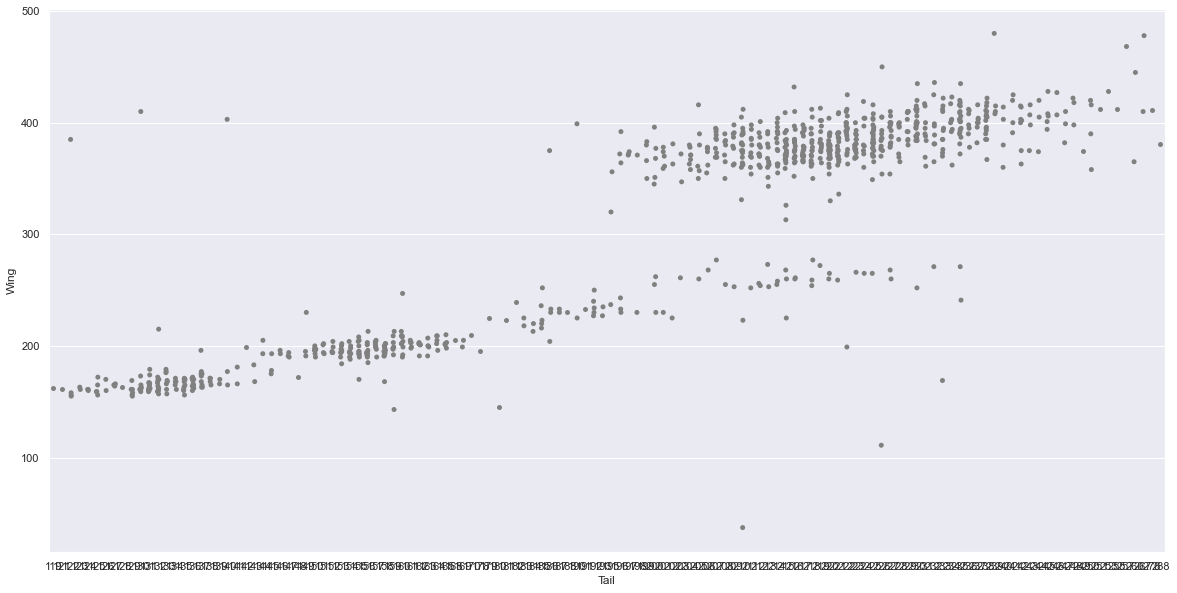

In [107]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.stripplot(x=data.Tail, 
              y=data.Wing, 
              ax=ax,
              color='grey')
plt.show() 

In [108]:
categories = ['Wing', 'Weight', 'Culmen', 'Hallux', 'Tail']
categorizable_data = data[categories].fillna(0)

In [109]:
inertie = []

for nb in range(1, 20):
    kmeans = KMeans(n_clusters=nb,
                    n_init=10, 
                    max_iter=300).fit(categorizable_data)
    inertie.append(kmeans.inertia_)

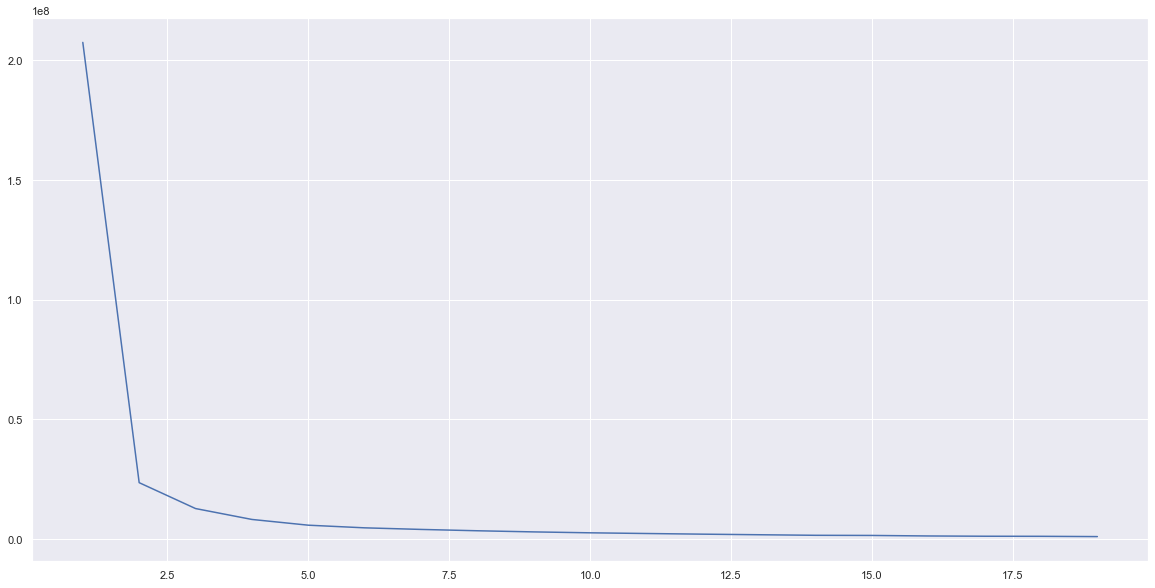

In [110]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x=list(range(1, len(inertie) + 1)), 
             y=inertie, 
             legend=False,
             ax=ax)
plt.show()

In [111]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters,
                    n_init=10, 
                    max_iter=300).fit(categorizable_data)
clusters_kmeans = kmeans.predict(categorizable_data)

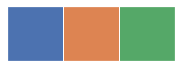

In [112]:
current_palette = sns.color_palette()
colors = {i: current_palette[i] for i in range(len(kmeans.cluster_centers_))}

sns.palplot(current_palette[:len(kmeans.cluster_centers_)]) # https://seaborn.pydata.org/tutorial/color_palettes.html
plt.show()

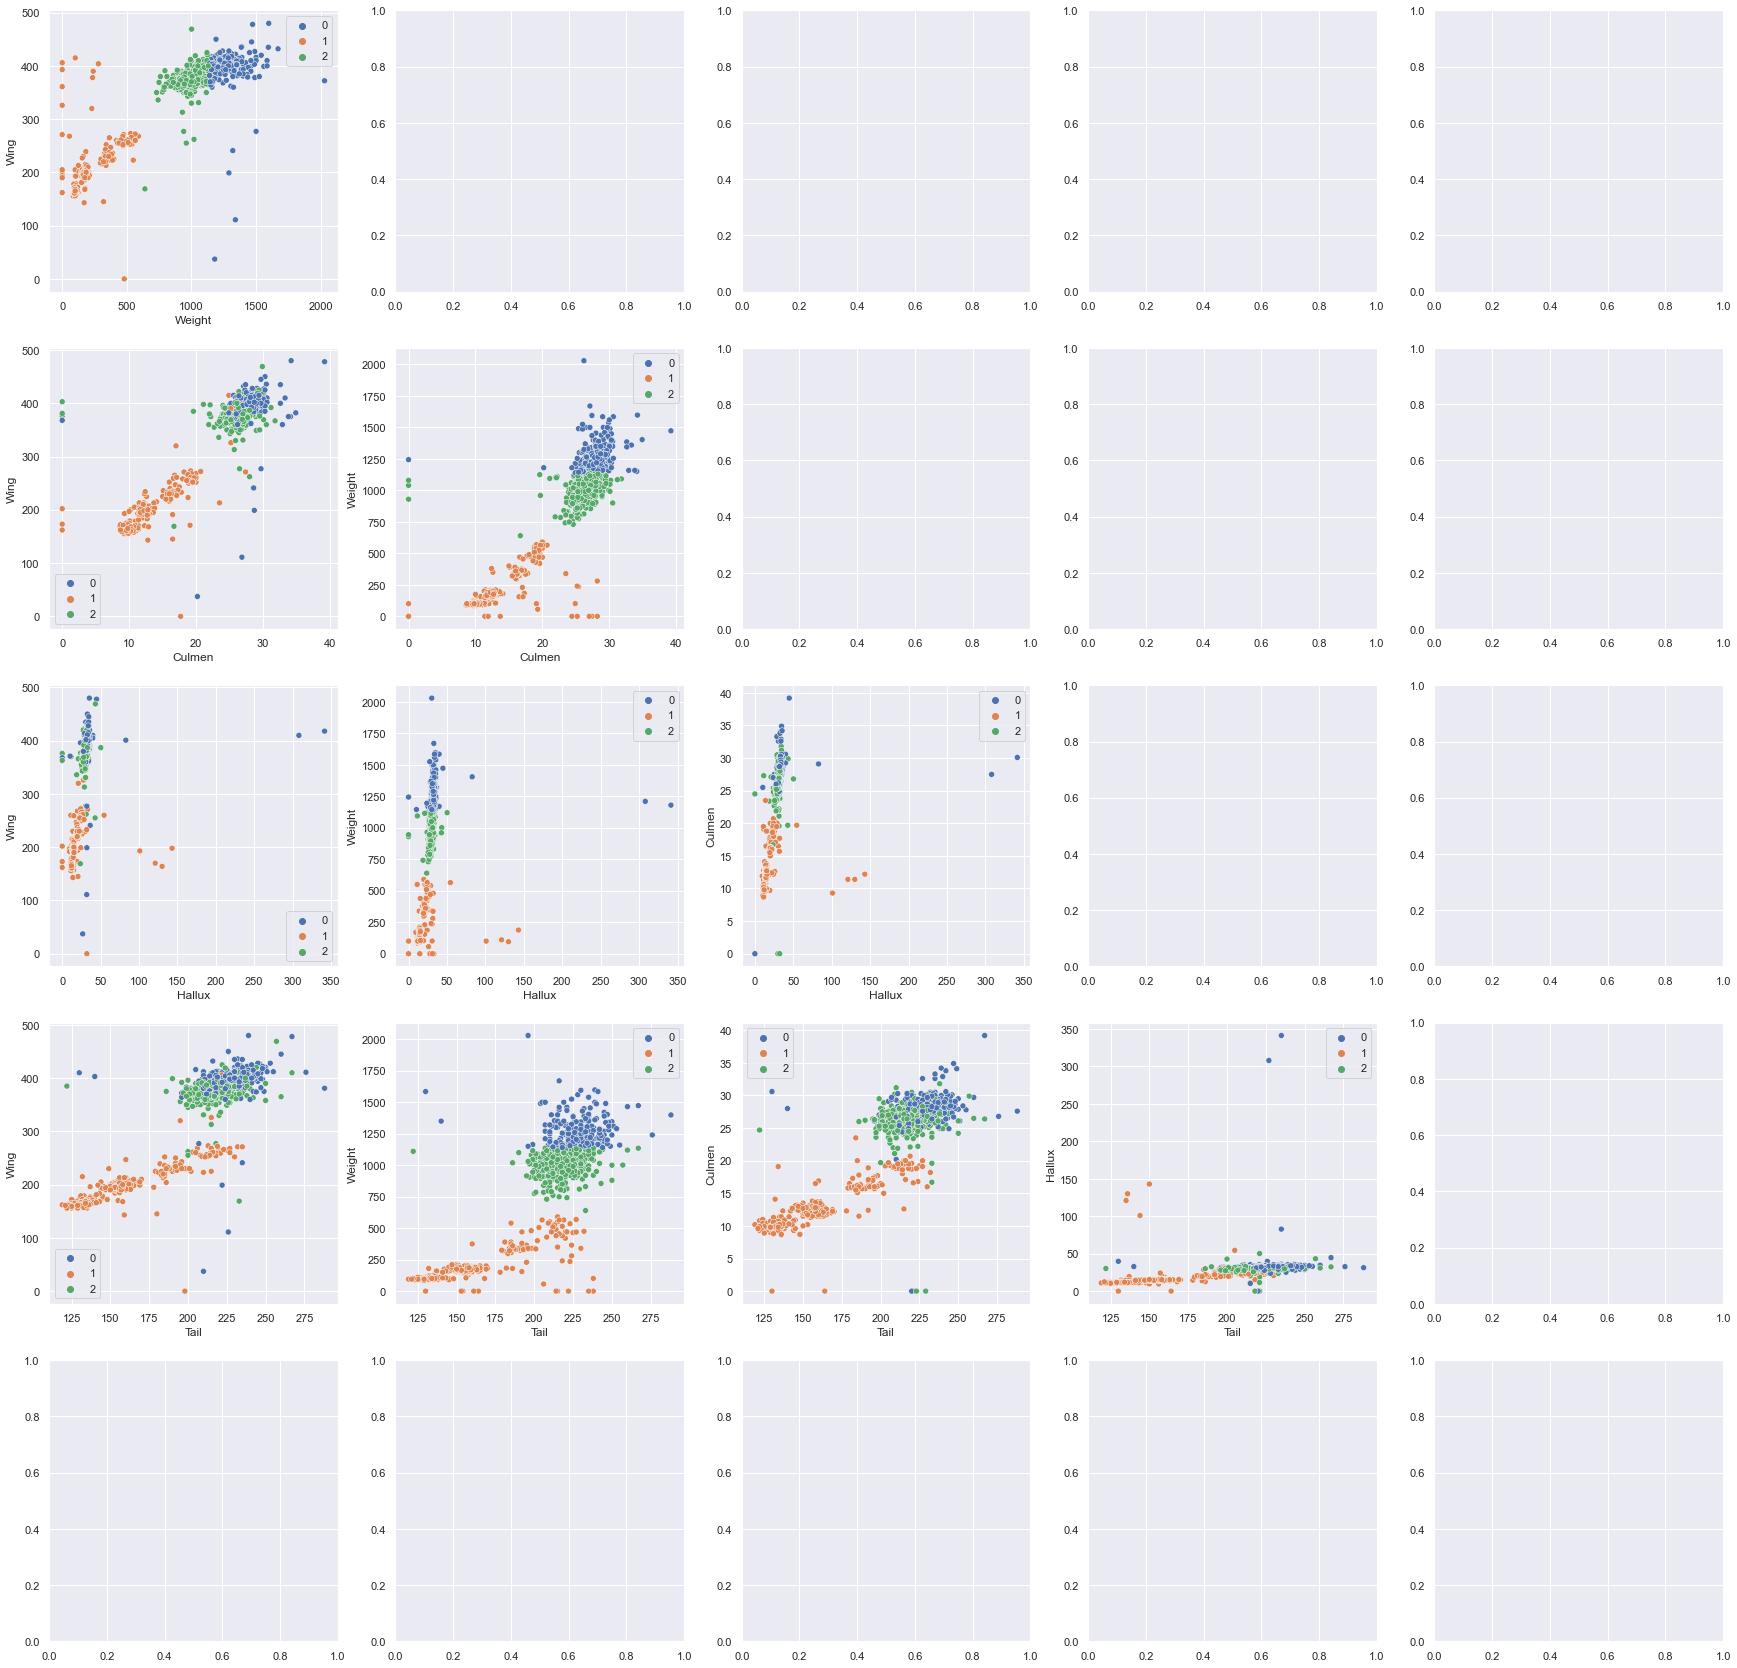

In [113]:
fig, ax = plt.subplots(5,5,figsize=(30, 30))

for i in range(5):
    for j in range(i):
        sns.scatterplot(x=categories[i], 
                        y=categories[j], 
                        data=categorizable_data,
                        hue=clusters_kmeans,
                        palette=colors,
                        ax=ax[i-1][j])

plt.show()

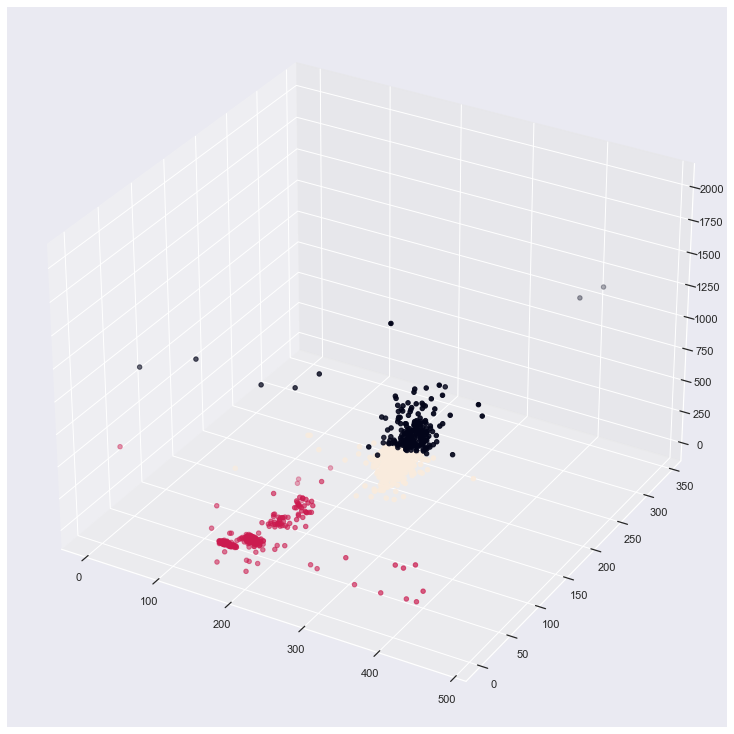

In [114]:
fig = plt.figure(figsize=(10,10))

ax = Axes3D(fig)

ax.scatter(categorizable_data.Wing, 
           categorizable_data.Hallux, 
           categorizable_data.Weight, 
           c=clusters_kmeans, 
           marker='o', 
           depthshade=True)
plt.show()